# Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [193]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [194]:
# Read in Logins json file 
logins= pd.read_json("logins.json")
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [195]:
logins.dtypes

login_time    datetime64[ns]
dtype: object

In [196]:
# Add a counts columns. For now it will be one for each row
logins['Counts']= 1

In [197]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   Counts      93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [198]:
# Make the date the index
logins.set_index('login_time', inplace=True)

In [199]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Counts  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [200]:
# Resample logins to 15 min increments and store in new df
logins_15= logins.resample('15min').sum()
logins_15.head()

,Counts
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [201]:
# Find min and max time stamps
time_min= logins_15.index.min()
time_max= logins_15.index.max()
# Find time delta of out data
time_delta= time_max - time_min
print('Our data covers {}'.format(time_delta))

Our data covers 101 days 22:45:00


## What do Login Counts Look like over time? 

Text(0.5, 1.0, 'User Logins Summed to 15 min Increments')

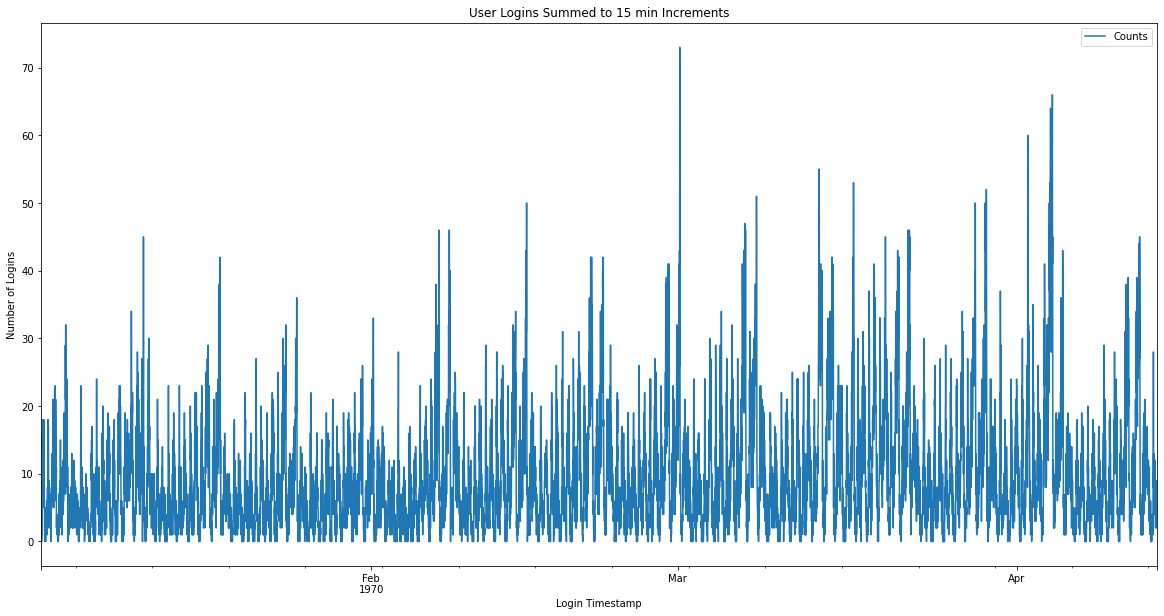

In [202]:
logins_15.plot(figsize= (20,10))
plt.xlabel('Login Timestamp')
plt.ylabel('Number of Logins')
plt.title('User Logins Summed to 15 min Increments')

## Is there a trend in how Login Counts Change over Time? 

Text(0.5, 1.0, 'User Logins With Various Moving Averages')

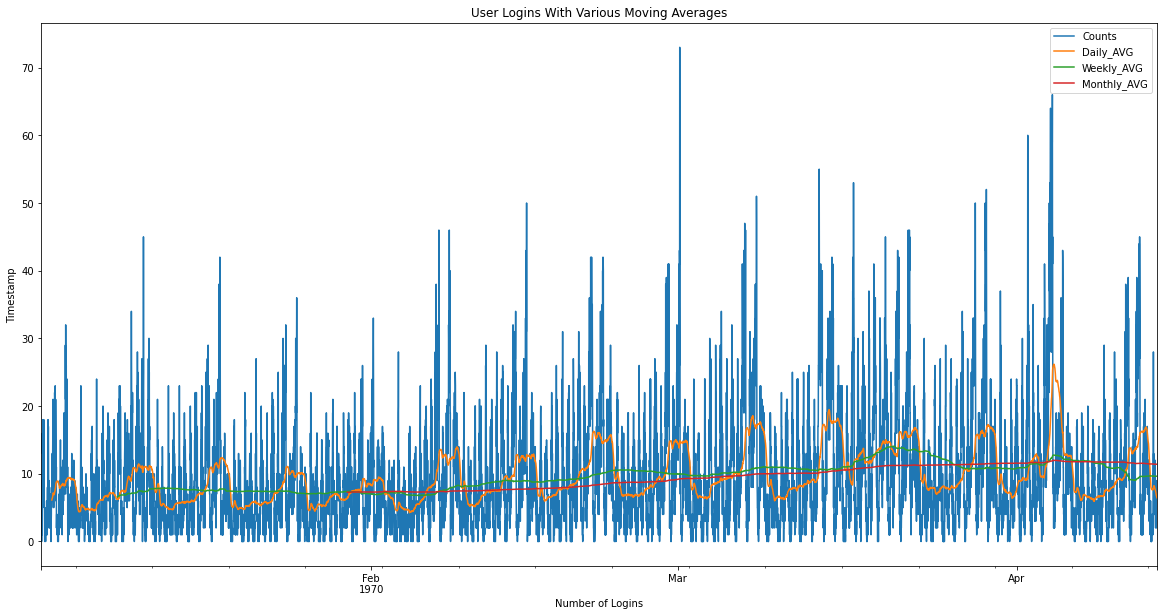

In [203]:
logins_df= logins_15.copy()
# Compute daily, weekly and monthly rolling averages to clarify trends
logins_df['Daily_AVG']= logins_15.Counts.rolling(window=96).mean()
logins_df['Weekly_AVG']= logins_15.Counts.rolling(window=672).mean()
logins_df['Monthly_AVG']= logins_15.Counts.rolling(window=2688).mean()
logins_df.plot(figsize=(20,10))
plt.xlabel('Number of Logins')
plt.ylabel('Timestamp')
plt.title('User Logins With Various Moving Averages')


Text(0.5, 1.0, 'User Logins With Various Moving Averages')

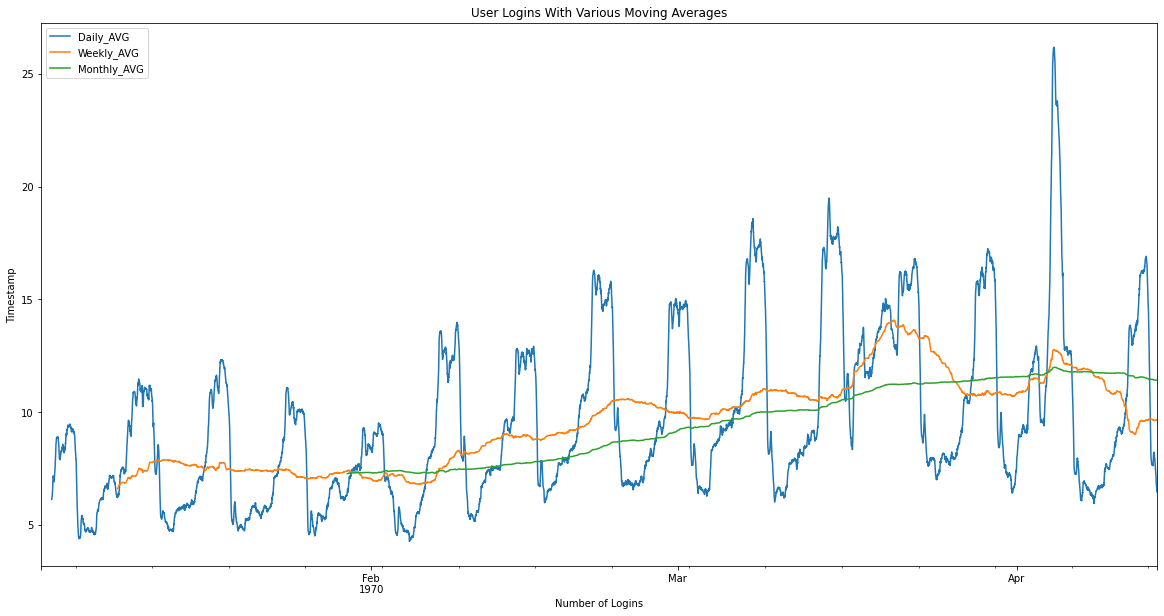

In [204]:
# Removing 15 min counts for trend clarity
logins_df.drop(columns='Counts').plot(figsize=(20,10))
plt.xlabel('Number of Logins')
plt.ylabel('Timestamp')
plt.title('User Logins With Various Moving Averages')

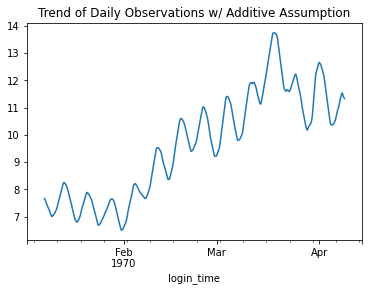

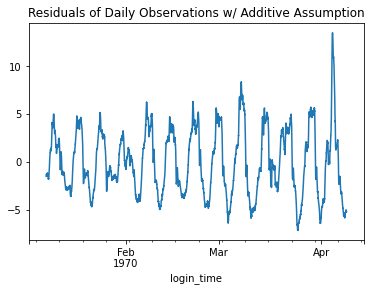

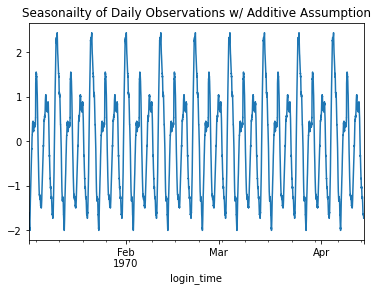

In [205]:
# Extract out the overall trend using seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(logins_df['Daily_AVG'].dropna(), model='additive', period=1000)
result.trend.plot()
plt.title("Trend of Daily Observations w/ Additive Assumption")
plt.show()
result.resid.plot()
plt.title("Residuals of Daily Observations w/ Additive Assumption")
plt.show()
result.seasonal.plot()
plt.title('Seasonailty of Daily Observations w/ Additive Assumption')
plt.show()

## There seems to be daily flucuation. Is that fluctuation consistent? 

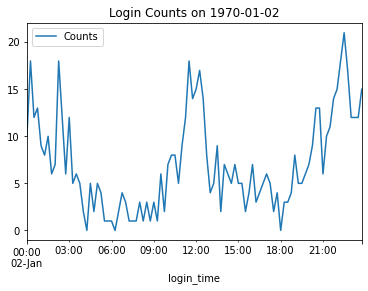

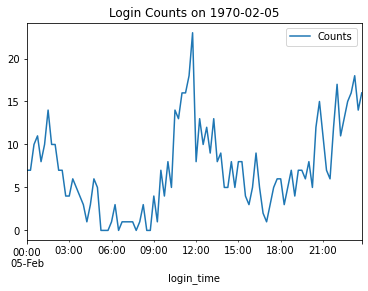

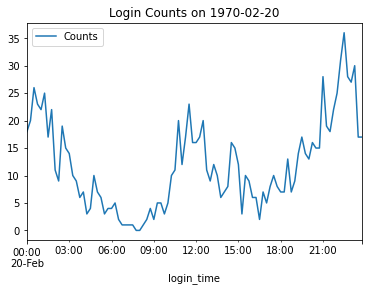

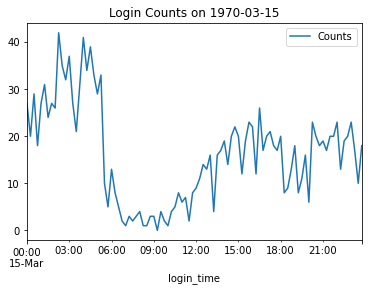

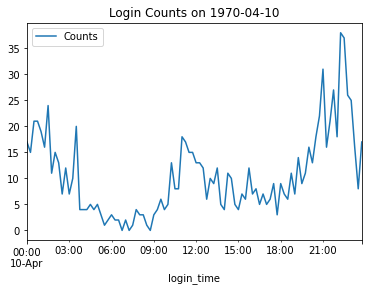

In [206]:
# plot Login Counts for a few random days
date= '1970-01-02'
logins_15.loc[date].plot()
plt.title('Login Counts on {}'.format(date))
plt.show()
date= '1970-02-05'
logins_15.loc[date].plot()
plt.title('Login Counts on {}'.format(date))
plt.show()
date= '1970-02-20'
logins_15.loc[date].plot()
plt.title('Login Counts on {}'.format(date))
plt.show()
date= '1970-03-15'
logins_15.loc[date].plot()
plt.title('Login Counts on {}'.format(date))
plt.show()
date= '1970-04-10'
logins_15.loc[date].plot()
plt.title('Login Counts on {}'.format(date))
plt.show()

 # Summary
 
 1) There does appear to be an overall upward trend in number of Logins over time
 
 2) Logins vary greatly over the course of each day. The pattern of fluctuation does appear to be somewhat consistent day to day
 
 